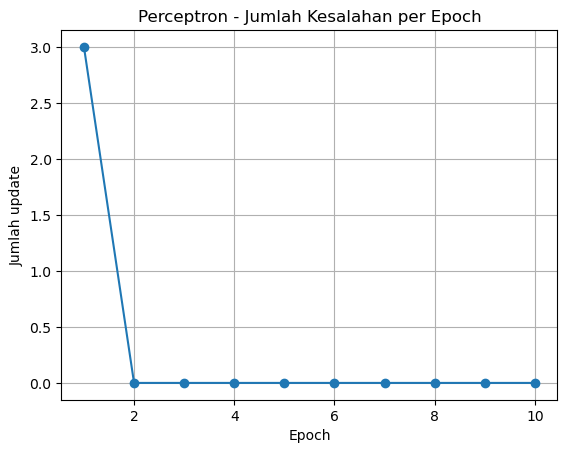

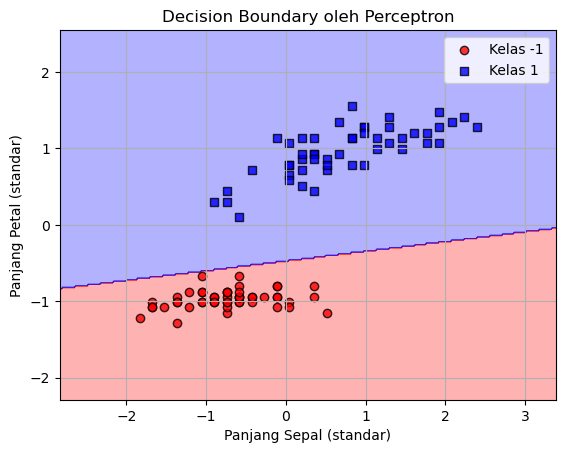

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data[:100, [0, 2]] 
y = iris.target[:100]       
y = np.where(y == 0, -1, 1)  

sc = StandardScaler()
X_std = sc.fit_transform(X)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=10):
        self.lr = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

ppn = Perceptron(learning_rate=0.1, n_iter=10)
ppn.fit(X_std, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Jumlah update')
plt.title('Perceptron - Jumlah Kesalahan per Epoch')
plt.grid()
plt.show()

def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ('o', 's') 
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0], y=X[y == cl, 1],
            alpha=0.8, c=colors[idx],
            marker=markers[idx], label=f'Kelas {cl}', edgecolor='black'
        )

plt.figure()
plot_decision_regions(X_std, y, classifier=ppn)
plt.xlabel('Panjang Sepal (standar)')
plt.ylabel('Panjang Petal (standar)')
plt.title('Decision Boundary oleh Perceptron')
plt.legend()
plt.grid()
plt.show()
